![Astrofisica Computacional](../../logo.PNG)

---
## RK4 method to describe the motion of a particle in a gravitational field


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

This notebook presents the application of the RK4 method to the problem of the motion of a particle in a gravitational field.

---

---

## Runge–Kutta methods

The idea behind the Runge-Kutta (RK) methods is to fit the Taylor series expansion of $y(x)$ at $x=x_n$ to the highest possible order. The fourth order method (RK4) is given by the following equations:

### RK4

\begin{align}
k_1 &=\Delta x f(x_n,y_n)\,\,,\\
k_2 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=\Delta x f(x_n + \frac{\Delta x}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=\Delta x f(x_n+\Delta x,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(\Delta x^5)\,\,.
\end{align}

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]
    f[2] = - G*M*q0[0]/(q0[0]**2 + q0[1]**2)**(3/2)
    f[3] = - G*M*q0[1]/(q0[0]**2 + q0[1]**2)**(3/2)
    return f

def conserv_quant(q):
    '''
    ------------------------------------------
    conserv_quant(q)
    ------------------------------------------
    Evaluates the total energy and the total 
    angular momentum for the system 
    ------------------------------------------
    Arguments:
    q: NumPy array with the state of the 
       system in the format
       q = [t, x, y, vx, vy]
    ------------------------------------------
    Returns:
    E : Total Energy
    L : Total Angular Momentum
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    CQ = np.zeros([len(q),3])
    CQ[:,0] = q[:,0] 
    v2 = q[:,3]**2 + q[:,4]**2
    r = np.sqrt(q[:,1]**2 + q[:,2]**2)
    E = v2/2 - G*M/r
    L = q[:,1]*q[:,4] - q[:,2]*q[:,3]
    CQ[:,1] = E
    CQ[:,2] = L
    return CQ


Summarizing these results, to obtain a bounded orbit for the comet's motion, the initial condition will be imposed

\begin{equation}
    \begin{cases}
    x_0 = & 1\text{au}\\
    y_0 = & 0 \\
    v^x = & 0 \\
    v^y = & 3\frac{\text{au}}{\text{yr}}.
    \end{cases}
\end{equation}

The temporal grid that will be used to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years.

In [2]:
# Computation time
import time

# Runge-Kutta 4 Algorithm
def RK4(ODE, t0, q0, tf, n):
    '''
    ------------------------------------------
    RK4(h, t0, q0)
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    n: Number of steps for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    dt = (tf - t0)/(n-1)
    q = np.zeros([n,len(q0)+1])
    q[0,0] = t0
    q[0,1:] = q0
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        k1 = dt*ODE(q[i-1,0], q[i-1,1:])
        k2 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k1/2)
        k3 = dt*ODE(q[i-1,0] + dt/2, q[i-1,1:] + k2/2)
        k4 = dt*ODE(q[i-1,0] + dt, q[i-1,1:] + k3)
        q[i,1:] = q[i-1,1:] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return q


# Creation of the time grid (in years)
t0 = 0.
tf = 20.

# Number of steps in the grid
n = 100000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
x = 1. # [au]
y = 0. # [au]
vx = 0. # [au/yr]
vy = 3. # [au/yr]
Q0 = np.array([x, y, vx, vy])



# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()

print('The computation time was:', end - start)

The computation time was: 1.4795341491699219


Visualization of the x-coordinate as function of time: 

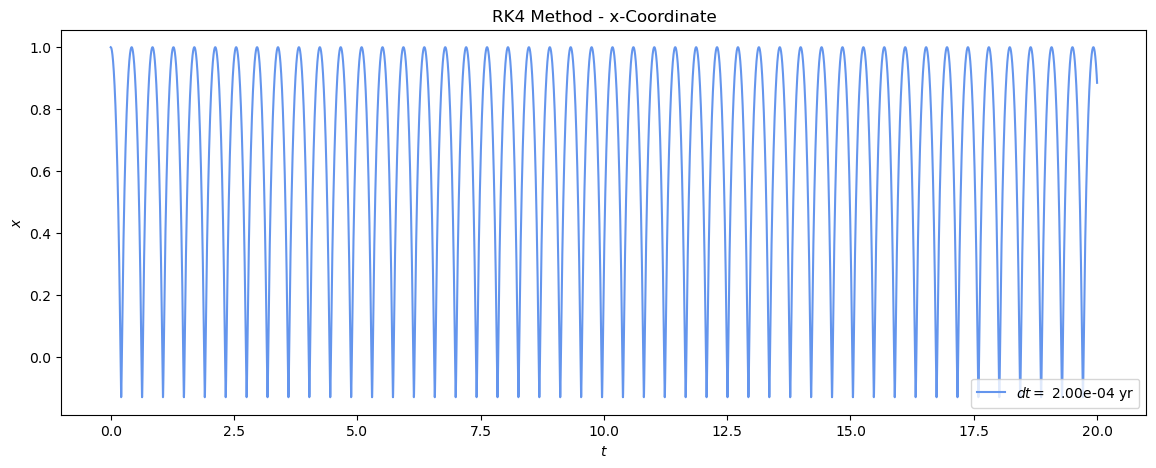

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax.set_title('RK4 Method - x-Coordinate')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.legend()

plt.show()

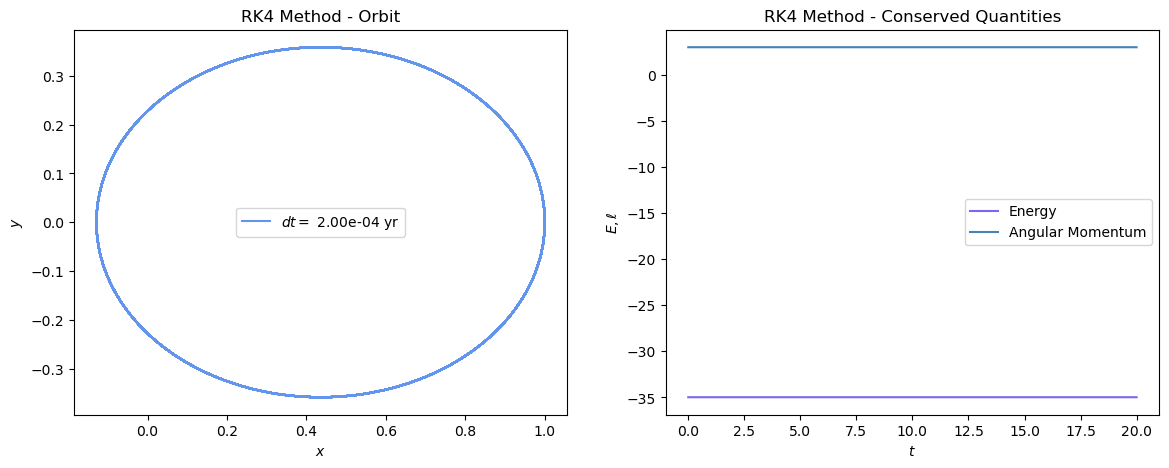

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

The change in energy and angular momentum is:

In [24]:
print('The energy change is :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nThe angular momentum change is :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

The energy change is : 1.1177314100052627e-05

The angular momentum change is : 5.112976264598501e-08


---



In [30]:
# Creation of the time grid (in years)
t0 = 0.
tf = 20.

# Number of steps in the grid
n = 500000

# Constant stepsize defined by the number of steps in the grid
dt = (tf - t0)/n

# Initial Conditions
Q0 = np.array([x, y, vx, vy])

# Solving the System
start = time.time()
Q = RK4(f, t0, Q0, tf, n)
conservedQuantities = conserv_quant(Q)
end = time.time()
print('The computation time was:', end - start)

The computation time was: 6.8523688316345215


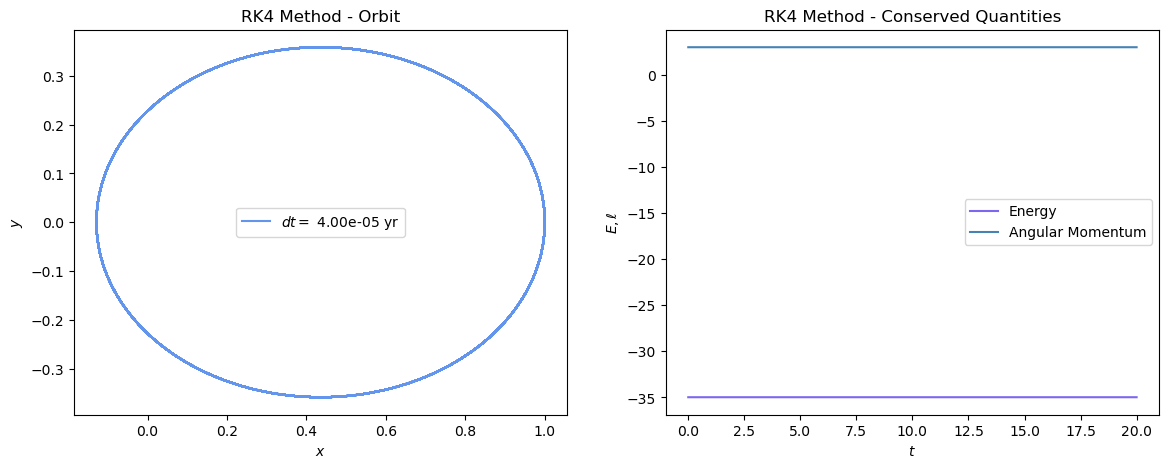

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('RK4 Method - Orbit')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('RK4 Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

In [32]:
print('The energy change is :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nThe angular momentum change is :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

The energy change is : 3.5737315329242847e-09

The angular momentum change is : 1.6333157049075453e-11


In [33]:
# Save data of the orbit
np.savetxt('particle_orbit.txt', Q, header='t x y vx vy')